# Overwatch: Can Your Competitive Rank be Predicted?

## Background

Overwatch Origins Edition was released on May of 2016 for Windows, PS4 and Xbox One, by Blizzard Entertainment. Blizzard is known for their Massive Multiplayer Online (MMO) and stragety based games, like World of Warcraft, Heroes of the Storm, and StraCraft. Overwatch features a team based first-person shooter with 26 characters split between four group classifications; Offense, Defense, Tanks, and Support. The structure of the game is based on team work to capture objectives and
transport cargo objectives, or hold capture points. The games design has a variety of modes to choose from, depending on the players preferred gaming style; Arcade mode, which presents challenges for a player to play solo or as a team, Quickplay mode, where players are queued with other players in non-ranked matches for the maps objectives, and Competitive mode, where players are queued with other players based on skill rating for map objectives and is only available during seasons.

Since it's release, the game has grown in popularity, with the most recent player count at 35 million in October of 2017, according to statista.com (2017) and pcgamesn.com (2017). Overwatch has entered into the esports community with the launch of Overwatch League (overwatchleague.com/en-us/) in 2018, showcasing the top competitive players in the Overwatch community. The competitive players are determined through the games Skill Rating system in Competitive matches, ranging from 1 to 4000+ (overwatch.gamepedia.com/Competitive_Play), with Bronze being the lowest and Grand Master being the highest (outside of the top 500 for the region).

With the demomstrated interest from the gaming community on Overwatch League, at 10 million viewers in the League's first week (dotesports.com/overwatch/news/overwatch-league-10-million-viewers-20274), Competitive Overwatch is a popular game mode. As a regular gamer, and an Overwatch fan, I regularly participate in Competitive matches, and I am working to rise in the ranks with each passing season. During my time playing Overwatch Competitive, I have tried to maintain a balance in the number of characters I play well, with the hope this will help me raise my Skill Rating. The Skill Rating system has been a topic in numerous gaming threads on reddit and Overwatch forums, as the community tries to determine the best way to rise in the ranks. My goal is to determine what is the best way to increase a player's skill rating, thus their Competitive Rank, by analyzing player's Overwatch console data.

---
## Problem Statement

**Does having the flexibility to play 2-3 characters increase your chances of a higher Skill Rating (SR), or should a player focus on 1 character and master them for a higher SR? Can I predict a player's SR from the number of characters they have played, by analyzing the total number of games played and the total wins/loss/ties for each character, from a span of three seasons? **

---
### Hypothesis

I believe that having the flexibilty to play 2-3 characters, well, provides a player the ability to adapt to a competitive match's team composition by filling in the needed group classification for that match. By creating a balanced team, the chances of winning the match increases, thus providing the player with a higher SR through out their competitive season.

By analyzing a player's game data, I will be able to predict their future seasons SR based on the number of characters they've played and the total games played with each character over a season. 


---
## Data
The data for this project was obtained by contacting Blizzard Entertainment through Omnicmeta.com. The data was provided for Season 5, 6, and 7 for about 100k players on combined Xbox/PS4 console. The data columns contain the player id (numerically randomized), SR, and wins/losses/ties for each hero (26 x 3).

The data is classified as confidential by the Blizzard and therefore can not be made public. Using a python script, I have created a dummy data set, with similar data to use as a representation of the data prepping work I will be performing on the data obtained from Omnicmeta. The final results will reflect the data from Omnicmeta.

---
### Data Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Defining constants
TG = 'totGames'
SR = 'skillrating'
PLAYER = 'player'
TC = 'Main_Char'
OFF = 'Offense'
DEF = 'Defense'
TAN = 'Tank'
SUP = 'Support'


# Create path for csv file
url = 'C:\Users\Chupi\Documents\GADataScience\Project_Work\OverwatchRankingsProject\owdata_dummy.csv'
#creating dataframe for the dummy data
OW = pd.read_csv(url, skipinitialspace = True)
OW.head()

,player_id,skillrating,Genji_wins,Genji_losses,Genji_ties,McCree_wins,McCree_losses,McCree_ties,Pharah_wins,Pharah_losses,...,Zenyatta_ties,Orisa_wins,Orisa_losses,Orisa_ties,Doomfist_wins,Doomfist_losses,Doomfist_ties,Moira_wins,Moira_losses,Moira_ties
0,2,2258,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,2,0,0
1,3,808,0,0,0,5,0,0,0,2,...,6,0,0,0,4,0,0,0,0,0
2,4,3408,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,2021,0,103,87,139,0,0,0,0,...,75,123,0,0,0,0,0,0,0,0
4,6,1562,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


---
### Processing the data
Because the data is so large, we need to reduce the amount of information we have by creating new columns for the total number of games played in the season, total number of games played by each character divided by the total number of games played, and then, the total characters played for each season. The ultimate goal is to have a dataframe with the columns as follows:

* Player
* SR
* Rank status
* Total Games Played
* Total Characters played
* Total Characters played in each category (4 columns)
* Total Character played in two category (6 columns)

This will require several steps. First step is to remove the whitespaces in the file, as they were disrupting the syntax for furture operations. 

Then we want to find the total number of games played by each player. This was acheived by creating a list of columns with each character. This column was then added to the end of the dataframe

From here, we will take the character column and divide by the total number of games played to create a new column of the percentage played of each character for the season (character ratio). After this, we will want to determine the most played characters, based on the the character ratio.

Next will be to count the total number of characters, whose sum will equal 80% of the total games played. To ensure I am including characters with higher game time played, I am setting a parameter that will exclude characters from the sum, whose cell values are less than or equal to 5%.

The following evaluation, took the sums of combinations of character categories, in groups of two only.

- OD: Offense & Defense
- DT: Defense & Tank
- TS: Tank & Support
- OT: Offense & Tank
- OS: Offense & Support
- DS: Defense and Support

In order to create the Logistic Model, I created a new column that categorizes the SR column into their corresponding Rank per https://overwatch.gamepedia.com/Competitive_Play (20 January 2018).

- Bronze - 1-1499 SR

- Silver - 1500-1999 SR

- Gold - 2000-2499 SR

- Platinum - 2500-2999 SR

- Diamond - 3000-3499 SR

- Master - 3500-3999 SR

- Grandmaster - 4000+

---

In [2]:
# Adding a new column totalGames that is the sum of the character columns 
col_list = list(OW.columns.values)

col_new = col_list[2:79]
OW[TG] = OW[col_new].sum(axis = 1)

#Create a blank df
OW_new = pd.DataFrame()

#redefine col_list
col_list = list(OW.columns.values)

#extracting the character name by splitting the column name by '_' to yield the first element
for name in col_list:
    char_name = name.split('_')[0]
    column = OW[name]
    
#Check if this column exists in the dataframe. If it does not, then add it.
    if not char_name in OW_new.columns:
        OW_new[char_name] = column
    #IF it already exist, sum it.
    else:
        prev_col = OW_new[char_name]
        OW_new[char_name] = column + prev_col
OW_new.head()

#redefine col_list to OW_ratio df
col_list = ['player', 'skillrating', 'totGames','Doomfist', 'Genji', 'McCree', 'Pharah', 'Reaper', 'Soldier76', 
            'Sombra', 'Tracer', 'Bastion', 'Hanzo', 'Junkrat', 'Mei', 'Torbjorn', 'Widowmaker',
            'D.Va','Orisa', 'Reinhardt', 'Roadhog', 'Winston', 'Zarya', 'Ana', 'Lucio', 'Mercy', 'Symmetra',
             'Zenyatta','Moira']
OW_new = OW_new[col_list]

# grouping the characters into their classification category
Offense = col_list[3:11]
Defense = col_list[11:17] 
Tank = col_list[17:23]
Support = col_list[23:29]

#Create a blank df
OW_new2 = pd.DataFrame()

# creating an empty list for the results to populate later
Off = []
Def = []
Tan = []
Sup = []


# Count the total number of character in each category class
for index, row in OW_new.iterrows():
    counter1 = 0
    counter2 = 0
    counter3 = 0
    counter4  = 0
    index = 3
    for cell in row[3:30]:
        col_name = col_list[index]
        index = index + 1
        if cell == 0:
            continue
        if col_name in Offense:
            counter1 = counter1 + 1
        elif col_name in Defense:
            counter2 = counter2 + 1
        elif col_name in Tank:
            counter3 = counter3 + 1
        elif col_name in Support:
            counter4 = counter4 + 1

    # filling in the empty list with the results of counter
    Off.append(counter1)
    Def.append(counter2)
    Tan.append(counter3)
    Sup.append(counter4)
#Add the columns from OW_new df to new df
OW_new2 = OW_new[col_list]

# Adding in the new columns to the df
OW_new2[OFF] = Off
OW_new2[DEF] = Def
OW_new2[TAN] = Tan
OW_new2[SUP] = Sup

#Create a blank df
OW_ratio = pd.DataFrame()

#redefine col_list
col_list = list(OW_new.columns.values)

#Add the columns player, SR and totalGames to the OW_ratio df
OW_ratio[PLAYER] = OW_new[PLAYER]
OW_ratio[SR] = OW_new[SR]
OW_ratio[TG] = OW_new[TG]
OW_ratio[OFF] = OW_new2[OFF]
OW_ratio[DEF] = OW_new2[DEF]
OW_ratio[TAN] = OW_new2[TAN]
OW_ratio[SUP] = OW_new2[SUP]

#Finding the charater play time ratio (total character games divided by total games) starting at index 2
for name in col_list[3:29]:
    char_total = OW_new[name]
    total_games = OW_new[TG]
    OW_ratio[name] = char_total.div(total_games, axis = 0)

# Create a new empty df
OW = pd.DataFrame()

# Pulling columns to new df
OW[PLAYER] = OW_ratio[PLAYER]
OW[SR] = OW_ratio[SR]
OW[TG] = OW_ratio[TG]
OW[OFF] = OW_ratio[OFF]
OW[DEF] = OW_ratio[DEF]
OW[TAN] = OW_ratio[TAN]
OW[SUP] = OW_ratio[SUP]

# Count the number of columns, whose sum is at least 80%, but does not include values under 5%.
min_value = 0.05
max_tot = 0.80
#creating an empty list for the results to populate later
col_counter = []
for index, row in OW_ratio.iterrows():
    counter = 0
    sum = 0
    for cell in row[7:33]:
        if cell > min_value:
            counter = counter + 1
            sum = sum + cell
            if sum >= max_tot:
                break;
    # filling in the empty list with the results of counter
    col_counter.append(counter)
# creating a new column that is set to the total count
OW[TC] = col_counter   

# Adding new columns for the sum of the combinations of categories
col_list = OW.columns

#OFF-DEF column
col_new = col_list[3:5]
OW['OD'] = OW[col_new].sum(axis = 1)

#DEF-TAN column
col_new = col_list[4:6]
OW['DT'] = OW[col_new].sum(axis = 1)

#TAN-SUP column
col_new = col_list[5:7]
OW['TS'] = OW[col_new].sum(axis = 1)

#OFF-TAN column
OW['OT'] = OW[OFF] + OW[TAN]

#OFF-SUP column
OW['OS'] = OW[OFF] + OW[SUP]

# DEF-SUP column
OW['DS'] = OW[DEF] + OW[SUP]


# Adding a new column for categorizing the SR into a string Rank. First create an empty list for the results of the for loop

col_rank = []
for value in OW[SR]:
    if value <= 1499:
        rank = 'Bronze'
    elif value <= 1999:
        rank = 'Silver'
    elif value <= 2499:
        rank = 'Gold'
    elif value <= 2999:
        rank = 'Platinum'
    elif value <= 3499:
        rank = 'Diamond'
    elif value <=3999:
        rank = 'Master'
    elif value > 4000:
        rank = 'Grandmaster'
    # filling in the empty list with the results of rank
    col_rank.append(rank)
# adding rank column to the df
OW['rank'] = col_rank

cols = ['player', SR, TG, TC, OFF, DEF, TAN, SUP, 'OD', 'DT', 'TS', 'OT', 'OS', 'DS', 'rank']

OW = OW[cols]
OW.head()

,player,skillrating,totGames,Main_Char,Offense,Defense,Tank,Support,OD,DT,TS,OT,OS,DS,rank
0,2,2258,79,7,3,2,2,3,5,4,5,5,6,5,Gold
1,3,808,233,3,6,2,2,3,8,4,5,8,9,5,Bronze
2,4,3408,476,1,1,1,4,1,2,5,5,5,2,2,Diamond
3,5,2021,646,4,5,1,3,2,6,4,5,8,7,3,Gold
4,6,1562,443,2,3,2,2,1,5,4,3,5,4,3,Silver


---
## Data Analysis: Predicting Rank

After the processing the data on season 5, 6, and 7, the first 20,000 rows of the three dataframes were merged together to create 1 master table. This is purely for time efficiency for this project, as 300,000 rows was running longer than expecting, delaying analysis.

``` 
OW = [S5, S6, S7]  
OW_master = pd.concat(OW)   
```

The master table was exported to csv so it the final data could be used for the modeling on this project.

```
OW_master.to_csv('C:\Users\Chupi\Documents\GADataScience\Project_Work\OverwatchRankingsProject\OW_master.csv', index = False)
```

In [3]:
#Reading the final Overwatch data into pandas
url = 'C:\Users\Chupi\Documents\GADataScience\Project_Work\OverwatchRankingsProject\OW_master.csv'
OW_master = pd.read_csv(url, skipinitialspace = True )
OW_master.head()

,player,skillrating,totGames,Offense,Defense,Tank,Support,Main_Char,OD,DT,TS,OT,OS,DS,rank
0,428566313,4215,21,4,2,1,1,3,6,3,2,5,5,3,Grandmaster
1,972712033,4684,47,2,1,4,2,7,3,5,6,6,4,3,Grandmaster
2,-618098531,4676,204,6,3,5,5,4,9,8,10,11,11,8,Grandmaster
3,-1732504529,4786,46,2,0,5,0,2,2,5,5,7,2,0,Grandmaster
4,-316142565,4533,73,0,0,1,0,1,0,1,1,1,0,0,Grandmaster


In [4]:
cols = ['player', SR, TG, TC, OFF, DEF, TAN, SUP, 'OD', 'DT', 'TS', 'OT', 'OS', 'DS', 'rank']
OW_master = OW_master[cols]
OW_master.head()

,player,skillrating,totGames,Main_Char,Offense,Defense,Tank,Support,OD,DT,TS,OT,OS,DS,rank
0,428566313,4215,21,3,4,2,1,1,6,3,2,5,5,3,Grandmaster
1,972712033,4684,47,7,2,1,4,2,3,5,6,6,4,3,Grandmaster
2,-618098531,4676,204,4,6,3,5,5,9,8,10,11,11,8,Grandmaster
3,-1732504529,4786,46,2,2,0,5,0,2,5,5,7,2,0,Grandmaster
4,-316142565,4533,73,1,0,0,1,0,0,1,1,1,0,0,Grandmaster


In [5]:
# gathering statistics of the data
feature_col = [SR, TG, TC, OFF, DEF, TAN, SUP]
OW_master[feature_col].describe()

,skillrating,totGames,Main_Char,Offense,Defense,Tank,Support
count,59997.000000,59997.000000,59997.000000,59997.000000,59997.000000,59997.000000,59997.000000
mean,2906.922579,96.178742,4.985966,3.295365,1.760105,3.352551,2.875677
std,434.871206,113.202857,1.995963,2.233453,1.690767,1.825268,1.568659
min,1087.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2608.000000,22.000000,4.000000,1.000000,0.000000,2.000000,2.000000
50%,2889.000000,54.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,3099.000000,127.000000,6.000000,5.000000,3.000000,5.000000,4.000000
max,4786.000000,1931.000000,13.000000,8.000000,6.000000,6.000000,6.000000


In [6]:
# Evaluating the correlation of the features within the data frame
corr = OW_master[feature_col].corr()
corr

,skillrating,totGames,Main_Char,Offense,Defense,Tank,Support
skillrating,1.000000,0.195816,-0.011515,0.132969,0.007829,0.140294,0.130843
totGames,0.195816,1.000000,0.127537,0.466778,0.515574,0.486043,0.500053
Main_Char,-0.011515,0.127537,1.000000,0.517950,0.412755,0.499136,0.384065
Offense,0.132969,0.466778,0.517950,1.000000,0.669921,0.541422,0.430605
Defense,0.007829,0.515574,0.412755,0.669921,1.000000,0.480683,0.434119
Tank,0.140294,0.486043,0.499136,0.541422,0.480683,1.000000,0.578848
Support,0.130843,0.500053,0.384065,0.430605,0.434119,0.578848,1.000000


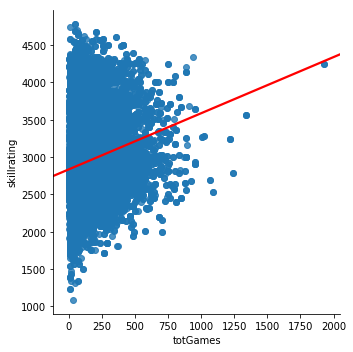

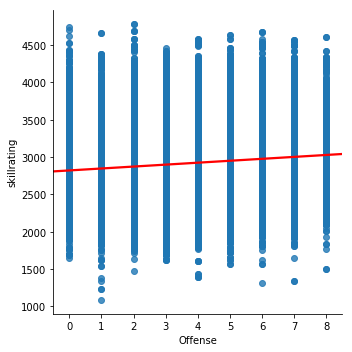

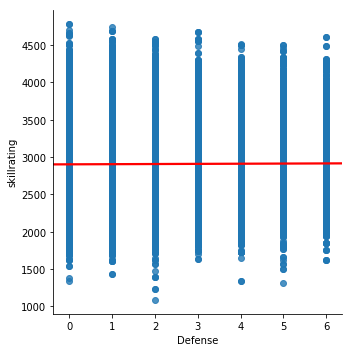

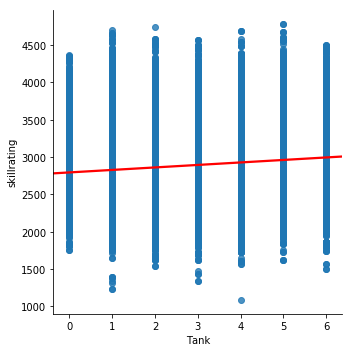

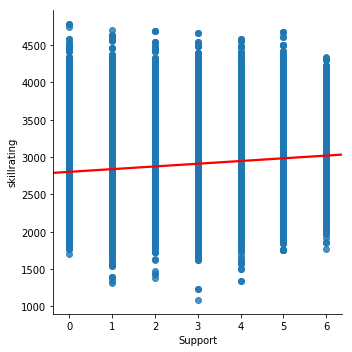

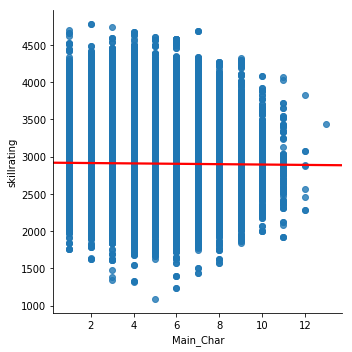

In [7]:
# evaluating the data in a scatter plot
sns.lmplot(x = TG, y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = OFF, y = SR, data = OW_master, ci = None,line_kws={'color': 'red'})
sns.lmplot(x = DEF, y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = TAN, y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = SUP, y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = TC, y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})

C:\Users\Chupi\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


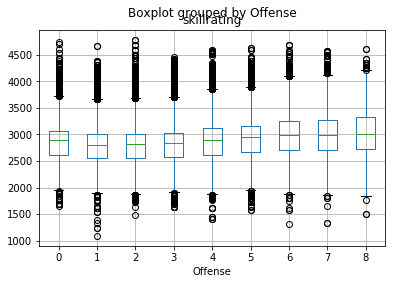

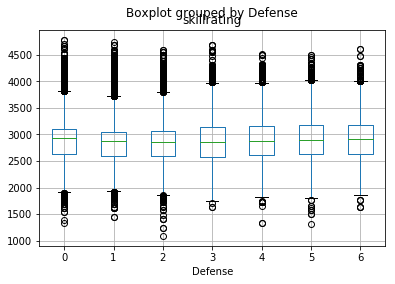

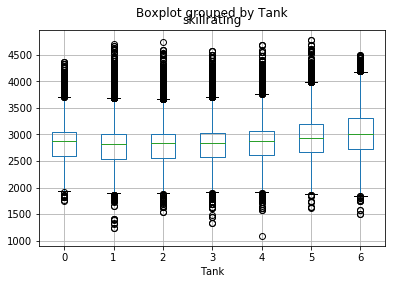

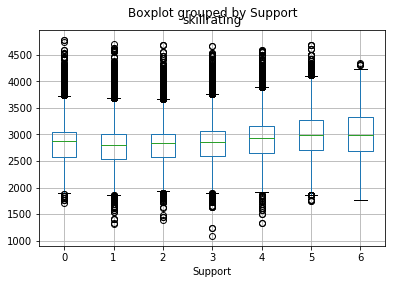

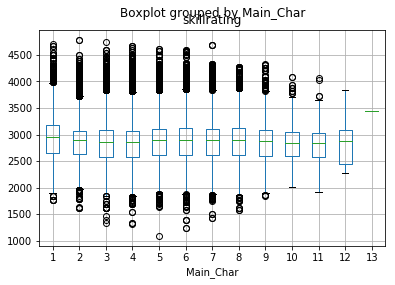

In [8]:
# SR boxplot grouped by Catergory and total main characters
OW_master.boxplot(column = SR, by = OFF)
OW_master.boxplot(column = SR, by = DEF)
OW_master.boxplot(column = SR, by = TAN)
OW_master.boxplot(column = SR, by = SUP)
OW_master.boxplot(column = SR, by = TC)

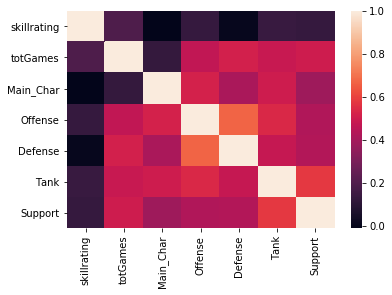

In [9]:
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values)

According to the correlation heat map, there is no correlation between SR and total number of characters played. The closest correlation with SR, is total number of games played. This is to be expected, as more time you spend playing in competitive matches, the better you become at the character(s) and more likely you are to rise in the ranks. 

There is also a correlation between the character's categories. When looking at the total games played, you can see there is a higher correlation for Defense characters, Support, Tank, and Offense character had about the similar correlations. 

Between the character categories, there also appears to be a correlation. Offense and Defense characters are highly correlated, indicating that players may have mains in these categories. Tank and Support characters are highly correlated, indicating that players may have mains in both categories.

Could this indicate playing specific categories, or combinations of categories result in a higher SR?

In [10]:
feature_col = [SR,TG, 'OD', 'DT','TS','OT','OS','DS']
corr2 = OW_master[feature_col].corr()
corr2

,skillrating,totGames,OD,DT,TS,OT,OS,DS
skillrating,1.000000,0.195816,0.086350,0.088997,0.152867,0.154982,0.155240,0.079138
totGames,0.195816,1.000000,0.532833,0.581238,0.553906,0.540753,0.564713,0.599867
OD,0.086350,0.532833,1.000000,0.835135,0.585765,0.874305,0.875721,0.811466
DT,0.088997,0.581238,0.835135,1.000000,0.834838,0.884559,0.770770,0.855934
TS,0.152867,0.553906,0.585765,0.834838,1.000000,0.808319,0.802403,0.810517
OT,0.154982,0.540753,0.874305,0.884559,0.808319,1.000000,0.897510,0.728705
OS,0.155240,0.564713,0.875721,0.770770,0.802403,0.897510,1.000000,0.856554
DS,0.079138,0.599867,0.811466,0.855934,0.810517,0.728705,0.856554,1.000000


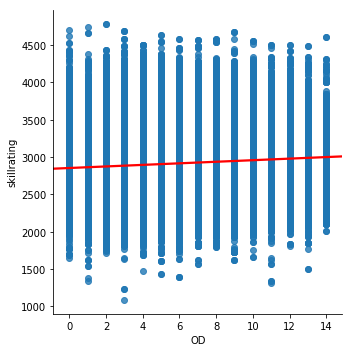

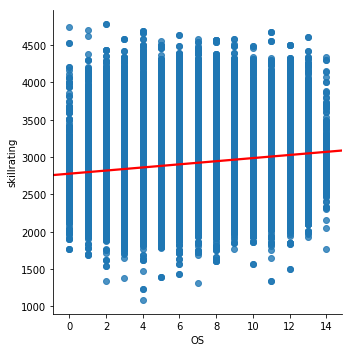

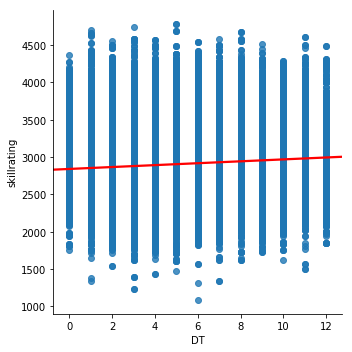

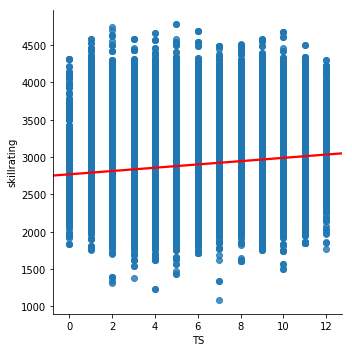

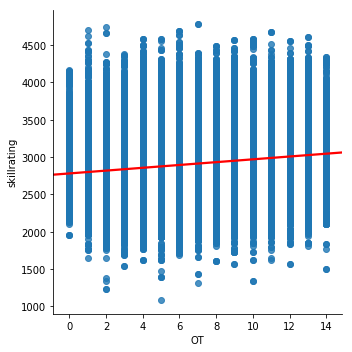

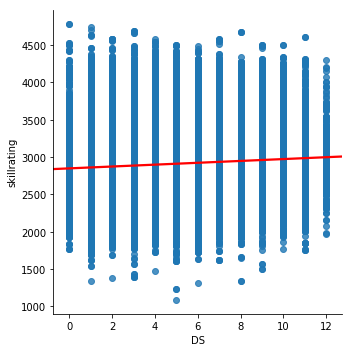

In [11]:
#evaluating the data in a scatter plot
sns.lmplot(x = 'OD', y = SR, data = OW_master, ci = None,line_kws={'color': 'red'})
sns.lmplot(x = 'OS', y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = 'DT', y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = 'TS', y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = 'OT', y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})
sns.lmplot(x = 'DS', y = SR, data = OW_master, ci = None, line_kws={'color': 'red'})

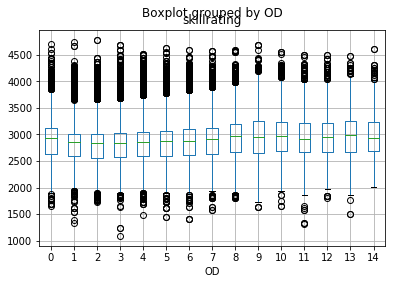

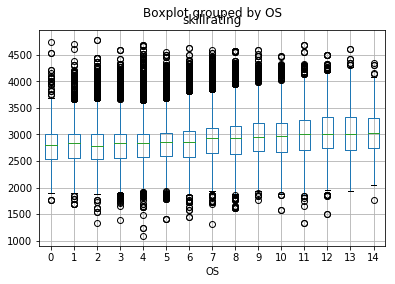

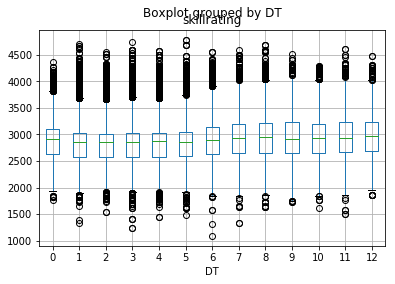

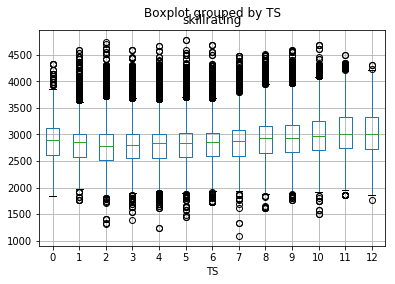

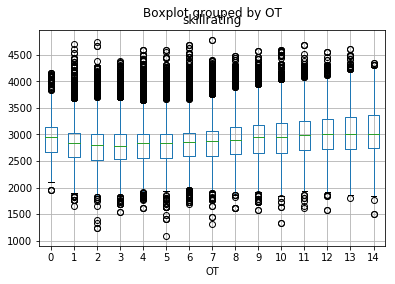

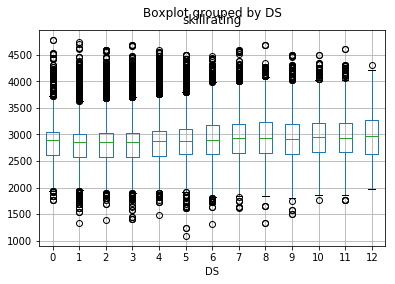

In [12]:
# SR boxplot grouped by Combo Catergories and total games
OW_master.boxplot(column = SR, by = 'OD')
OW_master.boxplot(column = SR, by = 'OS')
OW_master.boxplot(column = SR, by = 'DT')
OW_master.boxplot(column = SR, by = 'TS')
OW_master.boxplot(column = SR, by = 'OT')
OW_master.boxplot(column = SR, by = 'DS')

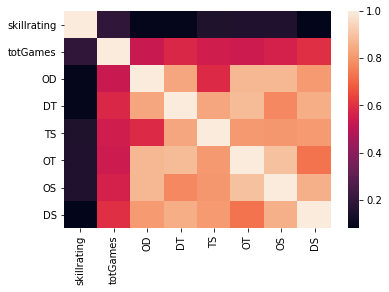

In [13]:
sns.heatmap(corr2,xticklabels = corr2.columns.values, yticklabels = corr2.columns.values)

# Linear Regression Modeling

In [14]:
# Creating an X feature and a y-response
feature_col = [TG, TC, OFF, DEF, TAN, SUP]
X = OW_master[feature_col]
y = OW_master['skillrating']

# setting up Logistic Regression Model
linreg = LinearRegression()

# fitting the model
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

2824.35229698
[  0.65789733 -21.55828476  37.14560086 -59.2670526   19.84990611
  14.65516005]


In [15]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_col):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linregp = LinearRegression()
    linregp.fit(X_train, y_train)
    y_pred = linregp.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print 'RMSE:', train_test_rmse([TG, TC, OFF, DEF, TAN, SUP])
print 'RMSE:', train_test_rmse([OFF, DEF, TAN, SUP])
print 'RMSE:', train_test_rmse([TG, TC,])
print 'RMSE:', train_test_rmse([TG, OFF, DEF, TAN, SUP])
print 'RMSE:', train_test_rmse([TG])

RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192


In [16]:
from sklearn.metrics import accuracy_score
y_pred = [300, 3, 2, 2, 1, 0]
y_true = [47, 7, 2, 1, 4, 2]

print 'Accuracy:', accuracy_score(y_true, y_pred)

Accuracy: 0.166666666667


In [17]:
# Creating an X feature and a y-response
feature_col = [TG, TC, 'OD','DT','TS','OT','OS','DS'] #Seeing if playing a combination of catergories can be predictive
X = OW_master[feature_col]
y = OW_master['skillrating']

# setting up Logistic Regression Model
linreg = LinearRegression()

# fitting the model
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

2824.35229698
[  0.65789733 -21.55828476 -13.12466161 -21.77250898  15.18859734
  26.43381775  23.83644472 -24.36988201]


In [18]:
def train_test_rmse2(feature_col):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linregp = LinearRegression()
    linregp.fit(X_train, y_train)
    y_pred = linregp.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print 'RMSE:', train_test_rmse2([TG, TC, 'OD','DT','TS','OT','OS','DS'])
print 'RMSE:', train_test_rmse2(['OD','DT','TS','OT','OS','DS']) # all combos
print 'RMSE:', train_test_rmse2(['OD','OT','OS']) # Offense combos
print 'RMSE:', train_test_rmse2(['DT','TS','OT']) # Tank Combos
print 'RMSE:', train_test_rmse2(['TS','OS','DS']) # Support combos
print 'RMSE:', train_test_rmse2(['OD','DT','DS']) # Defense combos
print 'RMSE:', train_test_rmse2([TG])

RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192
RMSE: 415.622004192


In [19]:
y_pred = [300, 3, 3, 5, 3, 1, 2, 1]
y_true = [47, 7, 3, 5, 6, 6, 4, 3]

print 'Accuracy:',accuracy_score(y_true, y_pred)

Accuracy: 0.25


---------------------
Our linear regression model's accuracy is very low, showing our predictions are not working with the data we have. 
A logistic model will not work with our data, as it isn't binary at this point.

To evaluate the data further, we will be looking at the cluster with respect to total games and skill rating

-----------------

# Conclusions

Given the data we have available, we are unable to predict a players SR based off of the number of characters they played as mains or in either category.

While this may appear to be a failure, the results show how well balanced the game design is and points towards a correlation between the total number of games played and a players SR (rank). Blizzards goal with Overwatch is to create a game with characters that are well balanced between each other, menaing no one character can hold all of the power in the game. The data shows that this goal has been accomplished, and the idea that playing more game to improve a players skill is supported with the evidence displayed in this project. 

---
### Cited Sources: 
Overwatch player statistics: https://www.pcgamesn.com/overwatch/overwatch-sales-numbers, https://www.statista.com/statistics/618035/number-gamers-overwatch-worldwide/
